<a href="https://colab.research.google.com/github/JennEYoon/ECG-transform/blob/main/notebooks/demo_read_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd


/content


# Demo, reading 100.csv file   
First upload 100.csv and 200.csv files to Google Colab.  Then read 100.csv into pandas dataframe

Let's see if the files have been uploaded.  Use "!ls" command, bang letter l, letter s.  This is Unix command for list.  
You should see "100.csv   200.csv   sample_data" in the printout below.

In [2]:
!ls

100.csv  200.csv  sample_data


Now let's import the Python libraries we're going to use today.

In [3]:
# libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


We're ready to read 100.csv file into Pandas dataframe.  This will allow us to manipulate the table-like data in a convenient way.

In [6]:

df100 = pd.read_csv('/content/100.csv')
print(type(df100))
print(df100)
print(len(df100))

<class 'pandas.core.frame.DataFrame'>
        Unnamed: 0       time_ms   MLII     V5
0                0  0.000000e+00 -0.145 -0.065
1                1  2.777778e+00 -0.145 -0.065
2                2  5.555556e+00 -0.145 -0.065
3                3  8.333333e+00 -0.145 -0.065
4                4  1.111111e+01 -0.145 -0.065
...            ...           ...    ...    ...
649995      649995  1.805542e+06 -0.075 -0.480
649996      649996  1.805544e+06 -0.445 -0.410
649997      649997  1.805547e+06 -0.675 -0.365
649998      649998  1.805550e+06 -0.765 -0.335
649999      649999  1.805553e+06 -1.280  0.000

[650000 rows x 4 columns]
650000


In [7]:
print(df100.describe())

          Unnamed: 0       time_ms           MLII             V5
count  650000.000000  6.500000e+05  650000.000000  650000.000000
mean   324999.500000  9.027764e+05      -0.306299      -0.191034
std    187638.981824  5.212194e+05       0.193200       0.148213
min         0.000000  0.000000e+00      -2.715000      -2.465000
25%    162499.750000  4.513882e+05      -0.390000      -0.265000
50%    324999.500000  9.027764e+05      -0.335000      -0.205000
75%    487499.250000  1.354165e+06      -0.270000      -0.145000
max    649999.000000  1.805553e+06       1.435000       1.225000


Let's plot a figure with just the first 5 seconds of heart beats.  This data is digitized at 360 samples per second (Hertz), so 5 seconds of data is 360 x 5 = 1,800 sample rows. We use Pandas to select a subset of the dataframe.  Note, first row was identified as a header row by default, when we read the .csv file.

In [15]:
# example:  selected_data = df.iloc[1:4, 2:5]
# row from 1 upto but excluding 4, col from 2 upto but excluding 5.

df5sec = df100.iloc[1:1801, 2:5]
df5sec

,MLII,V5
1,-0.145,-0.065
2,-0.145,-0.065
3,-0.145,-0.065
4,-0.145,-0.065
5,-0.145,-0.065
...,...,...
1796,-0.445,-0.270
1797,-0.480,-0.290
1798,-0.495,-0.280
1799,-0.520,-0.195


Now we use Matplotlib to make a figure.

In [19]:
X1 = df5sec['MLII'].to_numpy()
X2 = df5sec['V5'].to_numpy()
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [27]:
Y = df5sec.index / 360
Y.to_numpy()
Y = np.round(Y, 2)
Y

Index([ 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.03,
       ...
       4.97, 4.98, 4.98, 4.98, 4.99, 4.99, 4.99, 4.99,  5.0,  5.0],
      dtype='float64', length=1800)

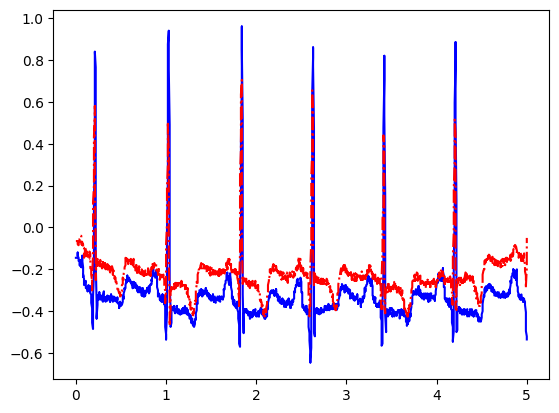

In [32]:
# plot with time as X-axis
plt.plot(Y, X1, 'b-')
plt.plot(Y, X2, 'r-.')

In [ ]:
# Customize gridlines
# example: plt.grid(color='r', linestyle='--', linewidth=0.5, alpha=0.6)
fig = plt.figure(1, figsize=(6, 8))
ax1 = X1
ax2 = X2
